# Music Genre Classification - Automatically classify different musical genres

This porject is going to use deep learning to automatically classify different musical genres from audio files. We will classify these audio files using their low level features of frequency and time domain.

In this project, dataset of audio tracks having similar size and similar frequency range will be used.

The GTZAN genre collection dataset that was collected in 2000-2001 will be used to train the model. It consists of 1000 audio files each having 30 seconds duration. There are 10 classes (10 music genres) each containg 100 audio tracks. Each track is in .wav format.
The 10 genres it has are: Blues, Classical, Country, Disco, Hiphop, Jazz, Metal, Pop, Reggae and Rock.

### MUSIC GENRE CLASSIFICATION APPROACH
Various methods to perform classification on this dataset, include:
Multiclass support vector machines, K-means clustering, K-nearest neighbors, Convolutional neural network.

### FEATURE EXTRACTION: 
The first step for music gerne classification, would be to extract features and components from the audio files. Which includes identifying content and discarding noise.

#### Mel Frequency Cepstral Coefficients:
These are state-of-the art features used in automatic speech and speech regonition studies. There are set of steps for generation of these features:

- Since the audi signals are constantly changing. first we divide these signals into      smaller frames. Each frame is around 20-40ms long
- Then we try to identify different frequencies present in each frame
- Now, separate linguistic frequencies from the noise
- To discard the noise, it then takes discrete cosine transform (DCT) of these frequencies. Using DCT we keep only a specific sequence of frequencies that have a high probability of information


Loading an Audio File

In [3]:
!pip install librosa

  Using cached librosa-0.9.2-py3-none-any.whl (214 kB)
  Using cached numpy-1.20.3-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.0
    Uninstalling numpy-1.23.0:
      Successfully uninstalled numpy-1.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.4.0 requires daal==2021.3.0, which is not installed.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.20.3 which is incompatible.


In [6]:
# source: https://github.com/farzanaanjum/Music-Genre-Classification-with-Python/blob/master/Audio%20Analysis%20in%20Python.ipynb

import warnings
warnings.filterwarnings('ignore')

In [1]:
import librosa
audio_path = '/home/gk/Downloads/PinkPanther30.wav'

x , sr = librosa.load(audio_path)

Playing Audio File

In [2]:
import IPython.display as ipd
ipd.Audio(audio_path)

### Visualising Audio

#### In Waveform

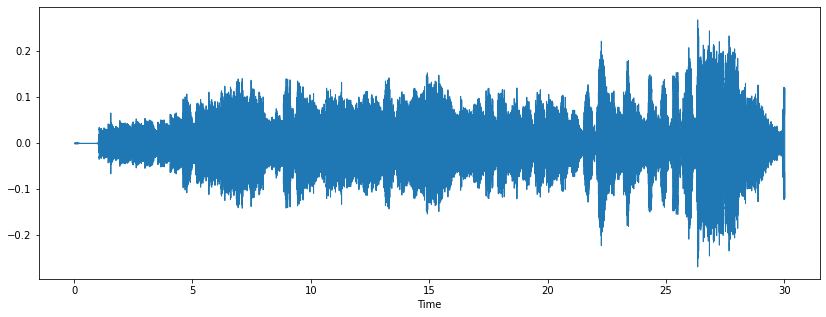

In [9]:
#Plotting the audio array using librosa.display.waveplot:

%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

#### In Spectrogram

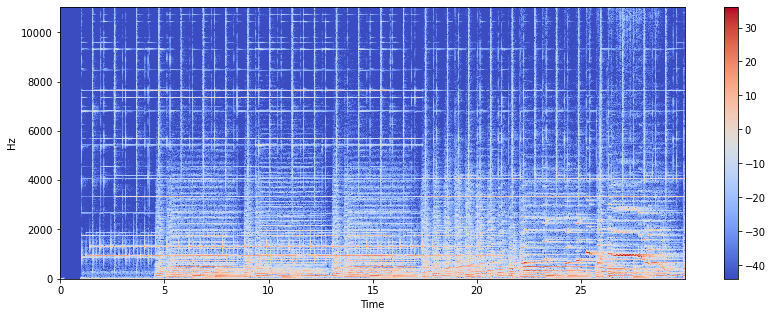

In [10]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

##### Log Frequency Axis

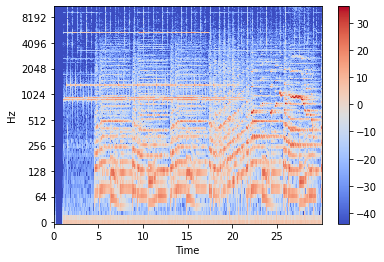

In [18]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

### Creating an Audio Signal

Let us now create an audio signal at 220HZ. We know an audio signal is a numpy array, so we shall create one and pass it on to the audio function

In [19]:
import numpy as np
sr = 22050 # sample rate
T = 5.0 # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t) # pure sine wave at 220Hz

#### Playing the sound

In [20]:
ipd.Audio(x, rate=sr) # Loading a NumPy array

#### Saving the signal

In [29]:

import soundfile as sf
sf.write('/home/gk/Projects Exercises/musicGenre/Tone/tone_440.wav', x, sr, 'PCM_24')


## Feature Extraction

In [30]:
x, sr = librosa.load(audio_path)
ipd.Audio(x, rate=sr)

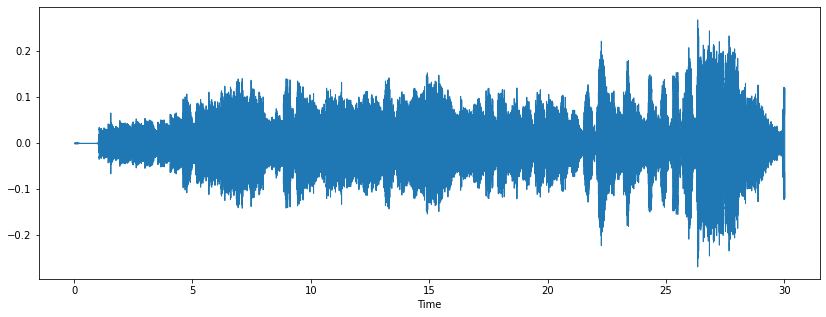

In [31]:
# Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

### 1. Zero Crossing Rate

The zero-crossing rate(ZCR) is the rate at which a signal changes from positive to zero to negative or from negative to zero to positive. Its value has been widely used in both speech recognition and music information retrival, being a key feature to classify percussive sounds

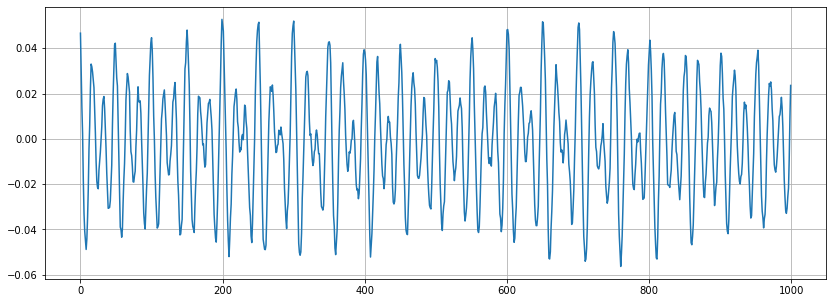

In [40]:
# Zooming in
n0 = 90000
n1 = 91000
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [41]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
zero_crossings.shape

(1000,)

In [42]:
print(sum(zero_crossings))

122


### 2. Spectral Centroid
The spectral centroid is a measure used in digital sinal processing to characterise a spectrum. It indicates where the center of mass ofthe spectrum is located. Perceptually, it has a robust connection with the impression of brightness of a sound.

In [11]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(1292,)

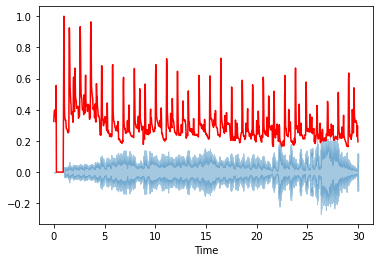

In [12]:
# Computing the time variable for visualisation
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

#Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')


### 3. Spectral Rolloff
Spectral rolloff is the frequency below which a specified percentage of the total spectral energy lies.

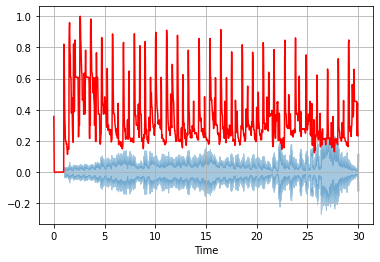

In [46]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveshow(x, sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.grid()

### 4. MFCC
In MFC, the freqeuncy bands are equally spaced on the mel scale, which approximates the human auditory system's response more closely than the linear-spaced frequency bands used in the normal spectrum.

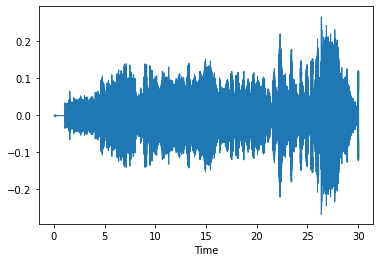

In [47]:
x, fs = librosa.load(audio_path)
librosa.display.waveshow(x, sr=sr)

(20, 1292)


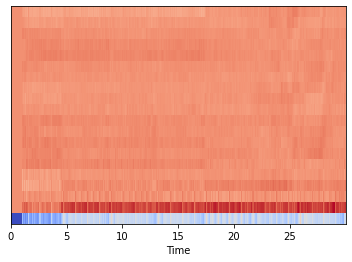

In [48]:
#MFCC
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')

### Feature Scaling


In [49]:
# Scaling the MFCCs such that each coefficient dimesion has a zero mean and unit variance:

mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[-1.1810208e-08  0.0000000e+00  0.0000000e+00  0.0000000e+00
 -1.1810208e-08  2.3620416e-08  0.0000000e+00  2.3620416e-08
  0.0000000e+00 -2.3620416e-08 -5.9051040e-09  0.0000000e+00
  0.0000000e+00  1.1810208e-08  2.9525520e-09  2.3620416e-08
  0.0000000e+00 -5.9051040e-09 -1.1810208e-08 -2.3620416e-08]
[1.        1.0000001 1.        0.9999999 1.        1.        1.
 1.        1.        1.0000002 1.        1.        0.9999999 1.
 1.        0.9999998 0.9999998 0.9999999 1.0000001 1.0000001]


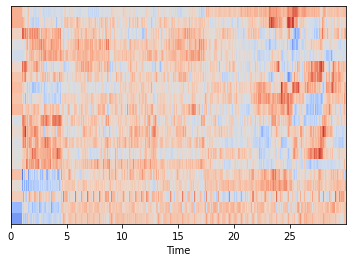

In [50]:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

### Chroma Frequencies

In [51]:
# Loading the file
x, sr = librosa.load(audio_path)
ipd.Audio(x, rate=sr)

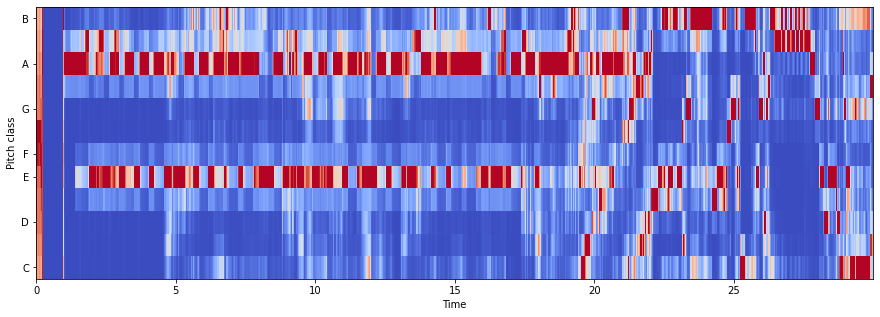

In [54]:
hop_length = 512
chromagram= librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

In [ ]:
# Next, use the following link to get to generate a data.csv file from the genre folder:
# https://medium.com/@alexandro.ramr777/audio-files-to-dataset-by-feature-extraction-with-librosa-d87adafe5b64

### Taking a feature vector of each audio file

In [18]:
# Loading the Audio Directory

from glob import glob

#directories of all the audio files
audioDirectory_toConvert = '/home/gk/"Projects Exercises"/musicGenre/genres/'
audioDirectory_toConvert = glob(audioDirectory_toConvert + '*.au')
'''

bluesAudio = '/home/gk/Projects Exercises/musicGenre/genres/blues/'
print(f'Number of Blues audio files : {len(bluesAudio)}')

classicalAudio = '/home/gk/Projects Exercises/musicGenre/genres/classical/'
print(f'Number of Classical audio files: {len(classicalAudio)}')

countryAudio = '/home/gk/Projects Exercises/musicGenre/genres/country/'
print(f'Number of Country audio files: {len(countryAudio)}')

discoAudio = '/home/gk/Projects Exercises/musicGenre/genres/disco/'
print(f'Number of Disco audio files: {len(discoAudio)}')

hiphopAudio = '/home/gk/Projects Exercises/musicGenre/genres/hiphop/'
print(f'Number of Hiphop audio files: {len(hiphopAudio)}')

jazzAudio = '/home/gk/Projects Exercises/musicGenre/genres/jazz/'
print(f'Number of Jazz audio files: {len(jazzAudio)}')

metalAudio = '/home/gk/Projects Exercises/musicGenre/genres/metal/'
print(f'Number of Metal audio files: {len(metalAudio)}')

popAudio = '/home/gk/Projects Exercises/musicGenre/genres/pop/'
print(f'Number of Pop audio files: {len(popAudio)}')

reggaeAudio = '/home/gk/Projects Exercises/musicGenre/genres/reggae/'
print(f'Number of Reggae audio files: {len(reggaeAudio)}')

rockAudio = '/home/gk/Projects Exercises/musicGenre/genres/rock/'
print(f'Number of Rock audio files: {len(rockAudio)}')
'''


audioDirectory_toConvert = '/home/gk/"Projects Exercises"/musicGenre/genres/'
print(f'Number of Total audio files : {len(audioDirectory_toConvert)}')


Number of Total audio files : 48


In [19]:
from glob import glob

#directories of all the audio files
audioDirectory_toConvert = '/home/gk/"Projects Exercises"/musicGenre/genres/blues/'
audioDirectory_toConvert = glob(audioDirectory_toConvert + '*.au')


In [20]:
import librosa

auidoDirectory_toConvert = []
for file in audioDirectory_toConvert:
    y, sr = librosa.load(file, sr=None)
    feature_vector = get_feature_vector(y, sr)
    audioDirectory_toConvert.append(feature_vector)

For each file, time-series-array (y) and a sampling rate (sr).

Given the time series array and the sampling rate, a function will be used to get a feature vector of the audio file.

A matrix with the feautre vectors of each audio file will be build. And later the matrix wil be saved in a .csv file.

### The get_feature_vector() function

In [21]:
import librosa
from librosa import feature
import numpy as np

fn_list_i = [
    feature.chroma_stft,
    feature.spectral_centroid,
    feature.spectral_bandwidth,
    feature.spectral_rolloff
]

fn_list_ii = [
    feature.rms,
    feature.zero_crossing_rate
]

def get_feature_vector(y, sr):
    feat_vect_i = [np.mean(funct(y,sr)) for funct in fn_list_i]
    feat_vect_ii = [np.mean(funct(y)) for funct in fn_list_ii]
    feature_vector = feat_vect_i + feat_vect_ii
    return feature_vector

The result of the first function will be applied to the time-series-array(y) in another array. The mean is then taken to have a concise numerical value of that feature in question.

Concept of high-order functions and list comprehensions are used.

### Building the matrix with the audios features

### Saving the file

In [22]:
import csv

audioDirectoryOutput = 'AllAudio.csv'

header =[
    'chroma_stft',
    'spectral_centroid',
    'spectral_bandwidth',
    'spectral_rolloff',
    'rms',
    'zero_crossing_rate'
]

with open(audioDirectoryOutput, '+w') as f:
    csv_writer = csv.writer(f, delimiter = ',')
    csv_writer.writerow(header)
    csv_writer.writerows(auidoDirectory_toConvert)
    

In [11]:
!pip install PyAudioAnalysis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 MB 1.1 MB/s eta 0:00:00m eta 0:00:010:00:01m
  Preparing metadata (setup.py) ... done
  Created wheel for PyAudioAnalysis: filename=pyAudioAnalysis-0.3.14-py3-none-any.whl size=41264389 sha256=088e179df10f2446ccdec19f1265b97e1506386989b540e0be34c89e11ef403a
  Stored in directory: /home/gk/.cache/pip/wheels/17/2b/6d/a471b671e635715037e006a8dd0dd129156926645bf1441d39
Successfully built PyAudioAnalysis


In [23]:
import PyAudioAnalysis

python3 audioAnalysis.py audioDirectory_toConvert -i data/ -mw 1.0 -ms 1.0 -sw 0.050 -ss 0.050

SyntaxError: invalid syntax (211934090.py, line 3)

## Data Preprocessing

### 1. Data transformation

To train the model, preprocessing of data is required. First of all, the .au file has to be converted into .csv file

- Defining columns name:

In [24]:
# source: https://notebooks.githubusercontent.com/view/ipynb?azure_maps_enabled=false&browser=chrome&color_mode=auto&commit=a84319b2141ca888a5abe5bf7d347c82b0dd2110&device=unknown&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6f76682f61692d747261696e696e672d6578616d706c65732f613834333139623231343163613838386135616265356266376433343763383262306464323131302f6e6f7465626f6f6b732f617564696f2f617564696f2d636c617373696669636174696f6e2f6e6f7465626f6f6b2d6d6172696e652d736f756e642d636c617373696669636174696f6e2e6970796e62&enterprise_enabled=false&logged_in=false&nwo=ovh%2Fai-training-examples&path=notebooks%2Faudio%2Faudio-classification%2Fnotebook-marine-sound-classification.ipynb&platform=android&repository_id=339729507&repository_type=Repository&version=102
# And this, to use later for creating streamlit app: https://hackernoon.com/intro-to-audio-analysis-recognizing-sounds-using-machine-learning-qy2r3ufl

header = "filename length chroma_stft_mean chroma_stft_var rms_mean rms_var spectral_centroid_mean spectral_centroid_var spectral_bandwidth_mean \
        spectral_bandwidth_var rolloff_mean rolloff_var zero_crossing_rate_mean zero_crossing_rate_var harmony_mean harmony_var perceptr_mean \
        perceptr_var tempo mfcc1_mean mfcc1_var mfcc2_mean mfcc2_var mfcc3_mean mfcc3_var mfcc4_mean mfcc4_var label".split()

- Create the audio.csv file

In [25]:
file = open("audio.csv", "w", newline = "")
with file:
    writer = csv.writer(file)
    writer.writerow(header)

- Define character string of audio samples(10):

The audio files are classified into 10 distinct genres.

In [26]:
genres = "blues classical country disco hiphop jazz metal pop reggae rock".split()


- Transform each .au file into a .csv row

In [27]:
# transform .au into .csv
import csv
import os
import numpy as np
import pandas as pd

for audio in genres:
    
    for filename in os.listdir(f"/home/gk/Projects Exercises/musicGenre/genres/{audio}/"):
        
        genre_name = f"/home/gk/Projects Exercises/musicGenre/genres/{audio}/{filename}"
        y, sr = librosa.load(genre_name, mono = True, duration = 30)
        chroma_stft = librosa.feature.chroma_stft(y = y, sr = sr)
        rmse = librosa.feature.rms(y = y)
        spec_cent = librosa.feature.spectral_centroid(y = y, sr = sr)
        spec_bw = librosa.feature.spectral_bandwidth(y = y, sr = sr)
        rolloff = librosa.feature.spectral_rolloff(y = y, sr = sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y = y, sr = sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
        
        for e in mfcc:
            to_append += f' {np.mean(e)}'
            
        to_append += f' {audio}'
        file = open('audio.csv', 'a', newline = '')
        
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())
            
        
        


- Display the audio.csv file:

In [28]:
df = pd.read_csv('audio.csv')
df.head()

filename    length  chroma_stft_mean  chroma_stft_var     rms_mean  \
0  blues.00066.au  0.374842          0.110470      2340.336211  2256.322435   
1  blues.00033.au  0.260820          0.133124      1430.598194  2075.652416   
2  blues.00006.au  0.291406          0.141688      1459.035376  1388.725515   
3  blues.00036.au  0.233196          0.197749      1247.408016  1907.705671   
4  blues.00065.au  0.292696          0.100305      2816.745920  2372.144439   

       rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  4972.269933                0.121775            -116.546364   
1  3246.755367                0.041970            -239.038071   
2  2795.674762                0.073028            -190.175018   
3  2621.575814                0.036904            -200.196091   
4  5614.507717                0.146318            -118.370331   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...      tempo  \
0                97.444626              -13.895614  ...  11.001678   
1               108.657204               34.151890  ... -11.256650   
2               130.292419              -36.348473  ...  -3.123599   
3               116.340134               18.006210  ... -12.015525   
4                74.867317              -19.869467  ...   7.555983   

   mfcc1_mean  mfcc1_var  mfcc2_mean  mfcc2_var  mfcc3_mean  mfcc3_var  \
0  -13.869425   9.742047   -5.094330   2.637372   -9.890765   6.160115   
1  -16.476931  -7.637186  -12.799123 -15.357241  -13.729804  -7.397779   
2   -6.595715  -9.947577   -6.540925 -10.071382  -10.912119  -6.970003   
3  -17.017956  -8.120277  -11.956443 -12.609148  -14.181589  -8.206693   
4  -22.900585   4.764417  -12.797208   5.620266  -14.738750   6.682403   

   mfcc4_mean  mfcc4_var  label  
0   -7.689136  -4.851008  blues  
1  -10.089319 -13.291538  blues  
2   -3.448513  -6.498458  blues  
3  -15.028046 -10.327059  blues  
4   -9.169973  -2.236193  blues  

[5 rows x 28 columns]

In [29]:
# dataframe shape
df.shape

(1000, 28)

In [30]:
# dataframe types
df.dtypes

filename                    object
length                     float64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
label                       object
dtype: object

### 2. Features extraction

In the preprocessing of the data, feature extraction is necessary before running the training. The purpose is to define the inputs and outputs of the neural network.

- OUTPUT (y): last column which is the label

One cannot use text directly for training. You have to encode these labels with the LabelEncoder() function of sklearn.preprocessing.

Thus, before running the model, the categorical text data is converted into numerical data that the model can understand.

In [31]:
# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


class_list = df.iloc[:,-1]
encoder = LabelEncoder()
y = encoder.fit_transform(class_list)
print("y: ", y)

y:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 

- INPUTS(X): all other columns are input parameters of the neural network except the filename

One removes the first column which does not provide any information for the training (the filename) and the last one which corresponds to the output.

In [32]:
input_parameters = df.iloc[:, 1:27]
scaler = StandardScaler()
X = scaler.fit_transform(np.array(input_parameters))
print("X:", X)

X: [[-0.04720113 -0.3109313   0.19344875 ...  1.46157943 -1.42776842
  -0.97921606]
 [-1.44344508  0.03427786 -1.0778837  ... -2.04371048 -2.06719548
  -3.17971161]
 [-1.06891171  0.16476851 -1.03814357 ... -1.93311242 -0.2980345
  -1.40871589]
 ...
 [-0.4048307   0.2285275  -0.75747861 ... -0.3058558  -1.40694454
   0.23155167]
 [ 0.36402508 -0.63081633  0.54390732 ...  1.02314987  0.68388821
   0.398555  ]
 [-0.19921304 -0.71679154 -1.122626   ...  0.27238656 -0.72372729
  -0.64852554]]


### 3. Splitting dataset for training

In [33]:
# training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

## Building the model

The first step is to build the model and display the summary.

For the CNN model, all hidden layers use a **ReLu** activation function, the output layer a **Softmax** function and a **Dropout** is used to avoid overfitting.

In [24]:
!pip install tensorflow

In [34]:
# model
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation = 'relu', input_shape = (X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(45, activation = 'softmax'),
])

print(model.summary())

2022-07-12 21:04:50.597563: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-12 21:04:50.597632: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               13824     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

2022-07-12 21:05:04.332376: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-12 21:05:04.332417: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-12 21:05:04.332439: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (gk): /proc/driver/nvidia/version does not exist


## Model training and evaluation

**Adam** optimizer is used to train the model over 100 epochs. This choice is made because it allows one to obtain better results.

The loss is calculated with the **sparse_categorical_crossentropy** function.

In [35]:
def trainModel(model, epochs, optimizer):
    batch_size = 128
    model.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
    return model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = epochs, batch_size = batch_size)


Now, launching the training.

In [36]:
model_history = trainModel(model = model, epochs = 100, optimizer = 'adam')

Epoch 1/100
7/7 [==============================] - 2s 51ms/step - loss: 3.5578 - accuracy: 0.1100 - val_loss: 3.0858 - val_accuracy: 0.2450
Epoch 2/100
7/7 [==============================] - 0s 15ms/step - loss: 2.7124 - accuracy: 0.2688 - val_loss: 2.2926 - val_accuracy: 0.2750
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 2.2015 - accuracy: 0.3038 - val_loss: 1.7988 - val_accuracy: 0.3450
Epoch 4/100
7/7 [==============================] - 0s 14ms/step - loss: 1.9280 - accuracy: 0.3313 - val_loss: 1.6514 - val_accuracy: 0.4000
Epoch 5/100
7/7 [==============================] - 0s 16ms/step - loss: 1.8522 - accuracy: 0.3638 - val_loss: 1.6498 - val_accuracy: 0.4050
Epoch 6/100
7/7 [==============================] - 0s 17ms/step - loss: 1.6788 - accuracy: 0.4275 - val_loss: 1.5341 - val_accuracy: 0.4600
Epoch 7/100
7/7 [==============================] - 0s 15ms/step - loss: 1.5323 - accuracy: 0.4725 - val_loss: 1.3793 - val_accuracy: 0.5050
Epoch 8/100
7/7 [===

- Display **loss** curves:

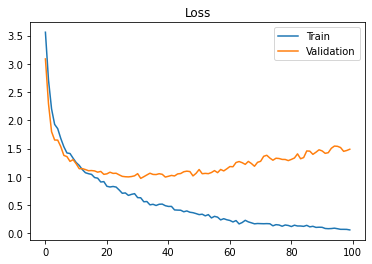

In [37]:
# import matplotlib to be able to display graphs
import matplotlib.pyplot as plt


loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

- Display **accuracy** curves:

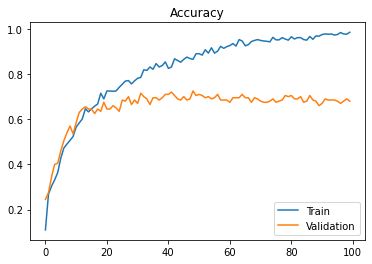

In [38]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [39]:
test_loss, test_acc = model.evaluate(X_val, y_val, batch_size = 120)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

2/2 [==============================] - 0s 5ms/step - loss: 1.4884 - accuracy: 0.6800
The test loss is:  1.4884371757507324
The best accuracy is:  68.00000071525574


## Make predictions on test data

To test the model and predict which genres new audios belong to, one can import audios into a *audio_test* folder

Here we are testing **2 new sounds.**

### 1. Test data preprocessing

To test the model, preprocessing of data is also required.

- Define columns name:

In [40]:
# header => for test data, we remove the columns "filename" and "label"

header_test = "filename length chroma_stft_mean chroma_stft_var rms_mean rms_var spectral_centroid_mean spectral_centroid_var spectral_bandwidth_mean \
        spectral_bandwidth_var rolloff_mean rolloff_var zero_crossing_rate_mean zero_crossing_rate_var harmony_mean harmony_var perceptr_mean perceptr_var tempo mfcc1_mean mfcc1_var mfcc2_mean \
        mfcc2_var mfcc3_mean mfcc3_var mfcc4_mean mfcc4_var".split()

- Create the *audio_test.csv* file: 

In [41]:
import csv

file = open('audio_test.csv', 'w', newline = '')
with file:
    writer = csv.writer(file)
    writer.writerow(header_test)

- Transform each .au file into a .csv row:

In [13]:
import os

for filename in os.listdir(f"/home/gk/Projects Exercises/musicGenre/audio_test/"):
    genre_name = f"/home/gk/Projects Exercises/musicGenre/audio_test/{filename}"
    y, sr = librosa.load(genre_name, mono = True, duration = 30)
    chroma_stft = librosa.feature.chroma_stft(y = y, sr = sr)
    rmse = librosa.feature.rms(y = y)
    spec_cent = librosa.feature.spectral_centroid(y = y, sr = sr)
    spec_bw = librosa.feature.spectral_bandwidth(y = y, sr = sr)
    rolloff = librosa.feature.spectral_rolloff(y = y, sr = sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y = y, sr = sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
        
    file = open('audio_test.csv', 'a', newline = '')
    
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())
        
        

    

NameError: name 'librosa' is not defined

- Display the audio_test.csv file:

In [43]:
df_test = pd.read_csv('audio_test.csv')
df_test.head()

filename    length  chroma_stft_mean  chroma_stft_var  \
0     StarWars60.wav  0.313132          0.132287      2234.563901   
1  PinkPanther30.wav  0.242508          0.032592      1594.314455   

      rms_mean      rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  2308.442376  4416.798292                0.121577             -74.990189   
1  1908.930850  3212.597241                0.096616            -326.135406   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  perceptr_var  \
0                93.245972              -20.552217  ...     -9.336253   
1               118.989166               -3.593954  ...     -7.625823   

      tempo  mfcc1_mean  mfcc1_var  mfcc2_mean  mfcc2_var  mfcc3_mean  \
0 -7.292593   -4.177976  -3.743385   -3.438606  -2.810564   -2.021040   
1 -6.613939   -7.521507  -3.806406    1.813789  13.785377    8.492167   

   mfcc3_var  mfcc4_mean  mfcc4_var  
0  -2.693630   -8.947721  -8.853886  
1   0.322816  -11.959731 -23.401924  

[2 rows x 27 columns]

In [44]:
X_test = scaler.transform(np.array(df_test.iloc[:, 1:27]))
print("X_test:", X_test)

X_test: [[-8.02867870e-01  2.15236135e-02  4.56350174e-02  1.25136646e-01
  -9.85320314e-02  4.29035176e-01  6.93820380e-01 -2.01403058e-01
  -5.36273564e-01 -1.41769504e+00 -5.33890309e-01 -1.61963643e+00
  -3.96134401e-01 -1.80494569e+00  1.49549743e-02 -1.51625124e+00
  -4.86093881e-01 -1.75211210e+00  1.00637865e-01 -1.10343824e+00
   8.88378219e-02 -8.64913714e-01  4.28194743e-01 -8.27488920e-01
  -1.76306496e+00 -2.02278966e+00]
 [-1.66768798e+00 -1.49761146e+00 -8.49094984e-01 -6.34317900e-01
  -8.63638766e-01 -1.67913572e-01 -1.81313272e+00  6.20766315e-01
   2.45871925e-01 -1.49772959e+00 -4.72348735e-01 -4.76069358e-01
   1.30369613e+00  4.57449379e-03  1.28653761e+00  1.00695861e-01
  -2.35135656e-01 -1.65103858e+00 -4.41420048e-01 -1.11602373e+00
   1.16692036e+00  2.76095799e+00  2.73959491e+00 -4.76097857e-02
  -2.56548732e+00 -5.81554826e+00]]


### **2. Predictions**

In [45]:
# generate predictions for samples
predictions = model.predict(X_test)
print (predictions)

1/1 [==============================] - 0s 116ms/step
[[7.55903777e-04 7.00408101e-01 1.23337191e-03 6.72917888e-02
  1.81298598e-03 9.70310494e-02 1.49581916e-04 6.90687224e-02
  5.88647798e-02 8.97887439e-05 4.75484150e-04 2.39453639e-05
  1.02574530e-04 4.70009763e-05 1.21819336e-04 4.87553662e-05
  6.82484824e-05 3.63743093e-05 1.78761169e-04 1.27940162e-04
  1.20865785e-04 1.45905477e-04 2.05779615e-05 3.97157055e-05
  1.56998969e-04 9.50106114e-05 6.19279745e-05 3.48416615e-05
  2.52349182e-05 4.44093719e-04 5.03107985e-05 9.43973191e-06
  6.73882896e-05 4.03344420e-05 1.05776002e-04 2.95662667e-05
  2.83531499e-05 1.47595798e-04 8.41255460e-05 1.46892140e-04
  1.82194181e-05 3.27433099e-06 2.74696267e-05 3.18960956e-05
  1.27215870e-04]
 [3.01953639e-13 9.99866247e-01 4.30078018e-09 2.44386882e-07
  6.09106099e-10 1.31845838e-04 4.81205614e-12 1.19163451e-06
  4.74469800e-07 2.53373237e-14 5.06425735e-11 7.05924289e-15
  4.10537706e-12 2.83650685e-12 5.51280701e-13 2.27554737e-13

In [46]:
# generate argmax for predictions

classes = np.argmax(predictions, axis = 1)
print (classes)

[1 1]


In [47]:
# transform classes number into classes name

result = encoder.inverse_transform(classes)
print (result)

['classical' 'classical']


## Step 8 - Save the model for future inference

To save the model, one should create another Object Storage Container (with write rights) and mount it in the workspace

In [48]:
model.save('/home/gk/Projects Exercises/musicGenre/model/my_model')

INFO:tensorflow:Assets written to: /home/gk/Projects Exercises/musicGenre/model/my_model/assets


In [49]:
# my_model directory
%ls /home/gk/"Projects Exercises"/musicGenre/model/

my_model/


In [50]:
# contains an assets folder, saved_model.pb, and variables folder
%ls /home/gk/"Projects Exercises"/musicGenre/model/my_model

assets/  keras_metadata.pb  saved_model.pb  variables/


In [51]:
model = tf.keras.models.load_model('/home/gk/Projects Exercises/musicGenre/model/my_model')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               13824     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

## **Conclusion**

The accuracy of the model can be improved by increasing the number of epochs, but after a certain period a threshold is reached, so the value should be determined accordingly/

The accuracy obtained for the test set is **68.00%** 


In [52]:
# Try to see if the accuracy can improve, by either changing epoch size or using a different optimizer besieds adams